In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import shap
import xgboost

c:\Users\ivan.trujillo_blueta\proyectos\personal\abalone_regression\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sns.set_style('whitegrid')

In [4]:
X_val = np.load('data/X_val.npy')
y_val = np.load('data/y_val.npy')

In [5]:
y_pred = pd.read_csv('data/submission_file.csv', header=0)
y_pred = y_pred['Rings'].to_numpy()

In [8]:
model = xgboost.XGBRegressor()
model.load_model('models/abalone_xgb_model.json')

In [13]:
explainer = shap.TreeExplainer(model, feature_perturbation='tree_path_dependent')
shap_values = explainer.shap_values(X_val)

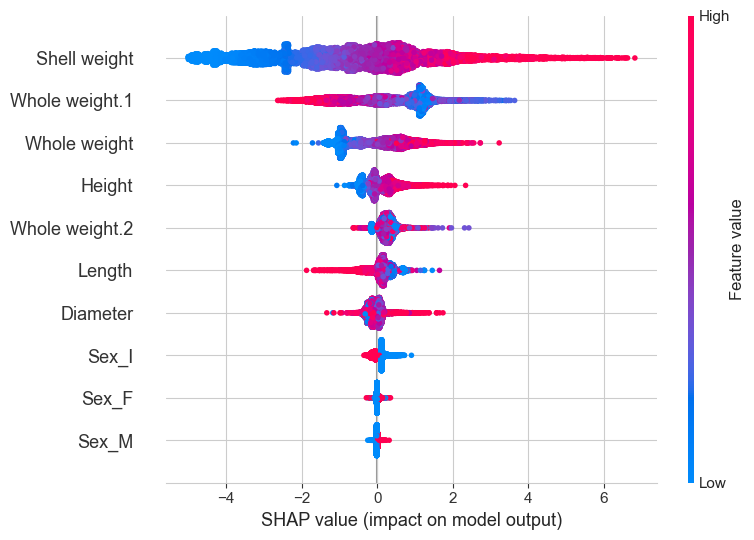

In [11]:
shap.summary_plot(shap_values, X_val, feature_names=["Length", "Diameter", "Height", "Whole weight", "Whole weight.1", "Whole weight.2", "Shell weight", "Sex_F", "Sex_I", "Sex_M"])

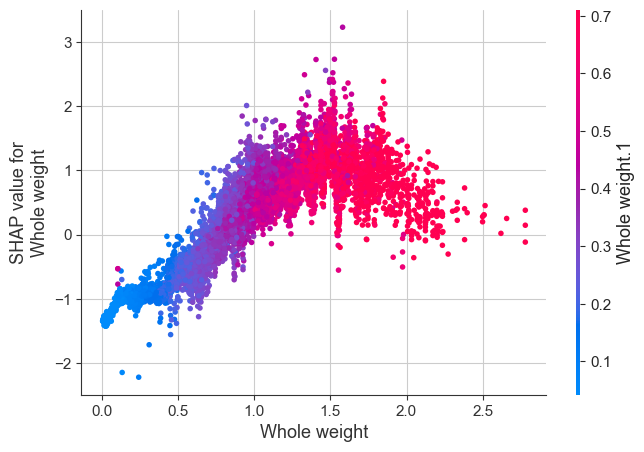

In [12]:
shap.dependence_plot("Whole weight", shap_values, X_val, interaction_index="Whole weight.1", feature_names=["Length", "Diameter", "Height", "Whole weight", "Whole weight.1", "Whole weight.2", "Shell weight", "Sex_F", "Sex_I", "Sex_M"])

In [15]:
shap.initjs()

In [16]:
shap.force_plot(explainer.expected_value, shap_values[0], X_val[0], feature_names = ["Length", "Diameter", "Height", "Whole weight", "Whole weight.1", "Whole weight.2", "Shell weight", "Sex_F", "Sex_I", "Sex_M"])

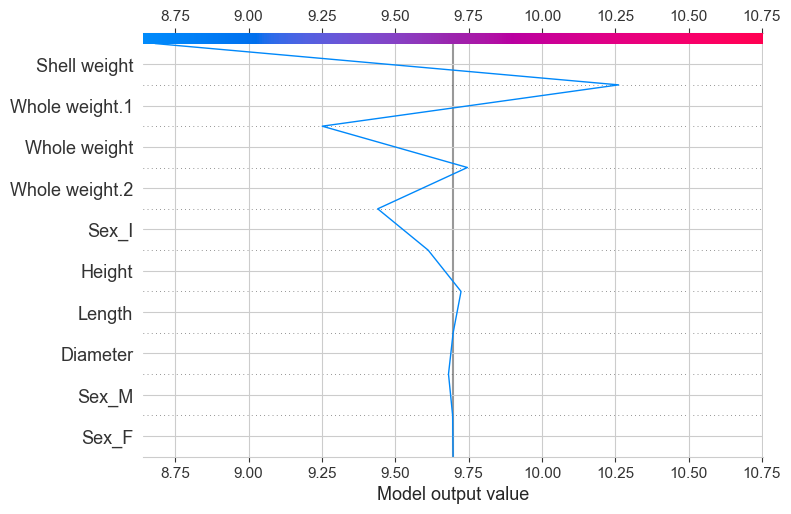

In [18]:
shap.decision_plot(explainer.expected_value, shap_values[0], feature_names = ["Length", "Diameter", "Height", "Whole weight", "Whole weight.1", "Whole weight.2", "Shell weight", "Sex_F", "Sex_I", "Sex_M"])